# EMT Ph1 Exponential Diode Test Circuit

## Run C++ examples

In [1]:
import os
import subprocess

#%matplotlib widget

name = 'EMT_Ph1_ExponentialDiode_test'

dpsim_path = subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')

path_exec = dpsim_path + '/build/dpsim/examples/cxx/'
sim = subprocess.Popen([path_exec + name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
print(sim.communicate()[0].decode())

[12:26:21.246208 EMT_Ph1_qRes info] Initialize simulation: EMT_Ph1_qRes
[12:26:21.246467 EMT_Ph1_qRes_Solver warning] Linear solver configuration is not used!
[12:26:21.246825 EMT_Ph1_qRes info] Scheduling tasks.
[12:26:21.247063 EMT_Ph1_qRes info] Scheduling done.
[12:26:21.247082 EMT_Ph1_qRes info] Opening interfaces.
[12:26:21.247083 EMT_Ph1_qRes info] Start synchronization with remotes on interfaces
[12:26:21.247085 EMT_Ph1_qRes info] Synchronized simulation start with remotes
[12:26:21.247087 EMT_Ph1_qRes info] Start simulation: EMT_Ph1_qRes
[12:26:21.247090 EMT_Ph1_qRes info] Time step: 1.000000e-04
[12:26:21.247092 EMT_Ph1_qRes info] Final time: 1.000000e-01
NonlinearResults: 
        0
0.0145898
        0
Old and new LeftVector:
         1
  0.618034
-0.0381966

  0.999507
  0.788634
-0.0210873

NonlinearResults: 
         0
0.00444674
         0
Old and new LeftVector:
  0.999507
  0.788634
-0.0210873

  0.999507
  0.813844
-0.0185662

NonlinearResults: 
         0
0.00344704


In [2]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import *
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import re
import numpy as np
import math

simName = "EMT_Ph1_qRes" #"EMT_Ph1_vs_diode"

work_dir = os.getcwd() + "/logs/"
path_logfile = work_dir + simName + '/' + simName + '.csv'
ts_dpsim_EMT = rt.read_timeseries_dpsim(path_logfile)

column number: 5
results length: 1001
real column names: ['qRes_I', 'qRes_V', 'r_I', 'r_V', 'vs0_v']
complex column names: []


### Load Results

Text(0, 0.5, 'Current [A]')

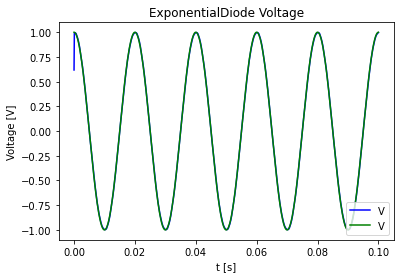

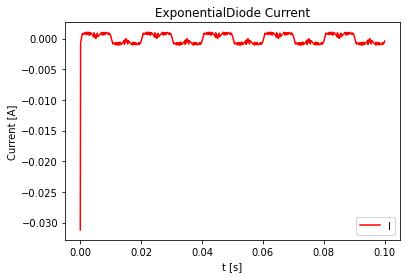

In [3]:
plt.close('all')
fig1 = plt.figure()


plt.plot(ts_dpsim_EMT['qRes_V'].time, ts_dpsim_EMT['qRes_V'].values, "b-", label='V')
#plt.plot(ts_dpsim_EMT['r_V'].time, ts_dpsim_EMT['r_V'].values, "b-", label='V')
plt.plot(ts_dpsim_EMT['vs0_v'].time, ts_dpsim_EMT['vs0_v'].values, "g-", label='V')

plt.legend(loc = 4)
#plt.legend(bbox_to_anchor=(1,1))

plt.title('ExponentialDiode Voltage')
plt.xlabel('t [s]')
plt.ylabel('Voltage [V]')

fig2 = plt.figure()

#plt.plot(ts_dpsim_EMT['qRes_I'].time, ts_dpsim_EMT['qRes_I'].values, "r-", label='I')
plt.plot(ts_dpsim_EMT['r_I'].time, ts_dpsim_EMT['r_I'].values, "r-", label='I')
#plt.plot(ts_dpsim_EMT['I_Load'].time, ts_dpsim_EMT['I_Load'].values, "r-", label='I_D')

plt.legend(loc = 4)
#plt.legend(bbox_to_anchor=(1,1))

plt.title('ExponentialDiode Current')
plt.xlabel('t [s]')
plt.ylabel('Current [A]')

## Validate against Simulink simulation

### Import Simulink results

In [4]:
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://raw.githubusercontent.com/MarvinTollnitschRWTH/reference-results/refs/heads/master/Simulink/Circuits/SL_ExpDiode.csv'
local_file = 'reference-results/SL_ExpDiode.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl_expDiode = rt.read_timeseries_simulink(local_file)

column number: 2
results length: 1001
real column names: ['ExpDiode_V', 'ExpDiode_I']
complex column names: []


### Plot dpsim against Simulink

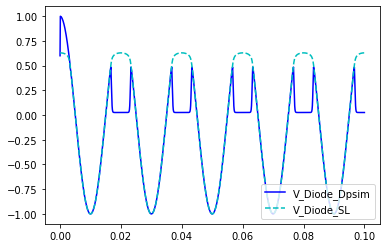

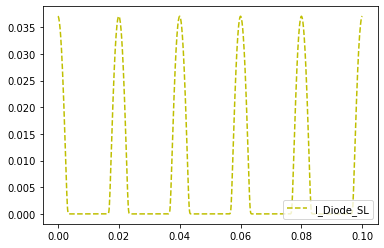

In [5]:
fig3 = plt.figure()

plt.plot(ts_dpsim_EMT['V_ExponentialDiode'].time, ts_dpsim_EMT['V_ExponentialDiode'].values, "b-", label='V_Diode_Dpsim')
plt.plot(ts_sl_expDiode['ExpDiode_V'].time, ts_sl_expDiode['ExpDiode_V'].values, "c--", label='V_Diode_SL')

plt.legend(loc = 4)


fig4 = plt.figure()

#plt.plot(ts_dpsim_EMT['I_ExponentialDiode'].time, ts_dpsim_EMT['I_ExponentialDiode'].values, "r-", label='I_Diode_Dpsim')
plt.plot(ts_sl_expDiode['ExpDiode_I'].time, ts_sl_expDiode['ExpDiode_I'].values, "y--", label='I_Diode_SL')

plt.legend(loc = 4)

### Assertion

In [ ]:
epsilon = 1e-100

assert(np.max(ts_dpsim_EMT['V_ExponentialDiode'].values-ts_sl_expDiode['ExpDiode_V'].values) < epsilon)
assert(np.max(ts_dpsim_EMT['I_ExponentialDiode'].values-ts_sl_expDiode['ExpDiode_I'].values) < epsilon)